In [164]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [173]:
# GOOD VERSION:

import os
import csv
import re

# Load data
rat = pd.read_csv('https://raw.githubusercontent.com/kjaitken/Micturition_readings/main/rat_raw_data.csv')

copyrat = rat.copy() #protect orig data
copyrat = copyrat.dropna()

## NB!!!!!!!!!!!! Adjust denominator 'x' as in next line for number of readings/min. will need to decomment.
#copyrat = copyrat.groupby(copyrat.index// 'x').mean()
## use this above IF MORE READINGS THAN 1 PER MINUTE USED


# Make a list of samples (this can be 1:7 if using 6 cages at a time. More is possible if your set up is different)
ratnm = copyrat.columns[1:7].tolist()

# Initialize a dictionary to store the averages and results for each sample
sample_data = {}

# Process each sample
for i, sample in enumerate(ratnm, start=1):
    # Calculate results for the sample
    copyrat[f'results.x{i}'] = copyrat[sample] - copyrat[sample].shift(1, fill_value=0)
    copyrat.loc[copyrat[f'results.x{i}'] < 0, f'results.x{i}'] = 0

    # Calculate column I
    copyrat[f'I.x{i}'] = copyrat[f'results.x{i}'] - copyrat[f'results.x{i}'].shift(2, fill_value=0)
    copyrat.loc[copyrat[f'results.x{i}'] > td, f'I.x{i}'] = "M"
    copyrat.loc[copyrat[f'results.x{i}'] <= td, f'I.x{i}'] = "na"

    # Calculate column K
    copyrat.loc[copyrat[f'I.x{i}'] == "M", f'K.x{i}'] = copyrat[f'results.x{i}']

    # Remove the first 15 or 30 minutes of data
    copyrat = copyrat.loc[30:, :]

    # Store the results, I, and K columns for the sample in the dictionary
    sample_data[sample] = {
        'results': copyrat[f'results.x{i}'],
        'I': copyrat[f'I.x{i}'],
        'K': copyrat[f'K.x{i}']
    }

copyrat.head()



,time,ra.x1,ra.x2,ra.x3,ra.x4,ra.x5,ra.x6,results.x1,I.x1,K.x1,...,K.x3,results.x4,I.x4,K.x4,results.x5,I.x5,K.x5,results.x6,I.x6,K.x6
30,31.0,0.42,2.41,1.83,1.22,1.17,0.78,0.0,na,NaN,...,1.83,1.22,M,1.22,1.17,M,1.17,0.78,M,0.78
31,32.0,0.42,2.41,1.83,1.21,1.17,0.78,0.0,na,NaN,...,NaN,0.00,na,NaN,0.00,na,NaN,0.00,na,NaN
32,33.0,0.41,2.40,1.82,1.21,1.17,0.78,0.0,na,NaN,...,NaN,0.00,na,NaN,0.00,na,NaN,0.00,na,NaN
33,34.0,0.41,2.40,1.82,1.21,1.17,0.78,0.0,na,NaN,...,NaN,0.00,na,NaN,0.00,na,NaN,0.00,na,NaN
34,35.0,0.41,2.40,1.81,1.20,1.16,0.77,0.0,na,NaN,...,NaN,0.00,na,NaN,0.00,na,NaN,0.00,na,NaN


In [174]:
import pandas as pd
import numpy as np

svt = 0.1; # small void threshold
#smt = 0.05; # solid material threshold not used for rats, just for mice
td = 0.02; # threshold of dection for rats. in mouse data: can evaluate decrease from minute 1-3 to 8-11

In [175]:
## IF desired, Rename one or more columns in the DataFrame. This will depend on the csv entirely
#copyrat = copyrat.rename(columns={'Latest: Time (min)':'time.min'})
#copyrat = copyrat.rename(columns={'Latest: 44.sham.N4 (g)':'44.sham.N4'})
#copyrat = copyrat.rename(columns={'Latest: 44.obst.N5 (g)':'44.obst.N5'})


In [176]:
# this should be working but is not.

output = [['rat id', '# of voids', 'Mean M volume', 'Max M volume', 'Total M volumes', '# of small voids']]

for sample, data in sample_data.items():

    small_voids = ((data['K'] > td) & (data['K']<=svt)).sum()
    volumes = data['K']
    num_voids = (data['K'] > td).sum()
    row = [sample, num_voids, np.mean(volumes), np.max(volumes), np.sum(volumes), small_voids]
    output.append(row)

output_df = pd.DataFrame(output[1:], columns=output[0])
print('M = micturition')
print(output_df)

M = micturition
  rat id  # of voids  Mean M volume  Max M volume  Total M volumes  \
0  ra.x1          24       0.222083          0.86             5.33   
1  ra.x2           3       1.123333          2.41             3.37   
2  ra.x3          15       0.318667          1.83             4.78   
3  ra.x4          27       0.195556          1.22             5.28   
4  ra.x5           2       0.935000          1.17             1.87   
5  ra.x6          20       0.446000          1.35             8.92   

   # of small voids  
0                10  
1                 1  
2                 5  
3                16  
4                 0  
5                 6  


### have a look at voids and volumes to look at distribution in samples.

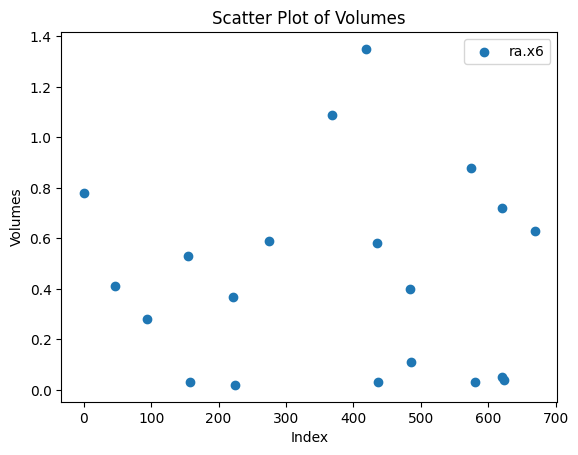

In [177]:
# num_voids
# volumes
import matplotlib.pyplot as plt
# Create histogram
scatterplots = {}
x = range(len(volumes))
plt.scatter(x, volumes, label=sample)
plt.xlabel('Index')
plt.ylabel('Volumes')
plt.title('Scatter Plot of Volumes')
plt.legend()

# Store the scatter plot for the sample
scatterplots[sample] = plt


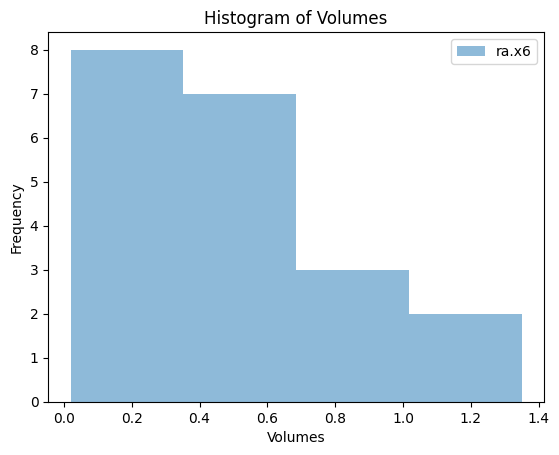

In [178]:
import matplotlib.pyplot as plt
import numpy as np

# Create histogram

plt.hist(volumes, bins=4, alpha=0.5, label=sample)
plt.xlabel('Volumes')
plt.ylabel('Frequency')
plt.title('Histogram of Volumes')
plt.legend()

        # Store the histogram for the sample
histograms[sample] = plt

In [ ]:
#upload residual volume data if known for each animal
residual_data = pd.read_csv('https://raw.githubusercontent.com/kjaitken/Micturition_readings/main/residual_data.csv')



In [180]:
# final calculations using residual data:
calcs_df = output_df.copy()
calcs_df = pd.concat([calcs_df, residual_data], axis=1)

# make empty columns to use for calculations:
calcs_df["Bladder capacity"]= calcs_df["residual_vol"] + calcs_df["Max M volume"]
calcs_df["Mean Micturition Fraction"]= calcs_df["Mean M volume"]/calcs_df["Bladder capacity"]
calcs_df["Maximum Micturition Fraction"]= calcs_df["Max M volume"]/calcs_df["Bladder capacity"]
calcs_df["Ratio of small to large voids"]= calcs_df["# of small voids"]/calcs_df["# of voids"]

calcs_df.to_csv('/content/drive/MyDrive/Colab Notebooks/calcs_df.csv', index=False)

calcs_df

,rat id,# of voids,Mean M volume,Max M volume,Total M volumes,# of small voids,rat id #,residual_vol,Bladder capacity,Mean Micturition Fraction,Maximum Micturition Fraction,Ratio of small to large voids
0,ra.x1,24,0.222083,0.86,5.33,10,ra.x1,1.0,1.86,0.119400,0.462366,0.416667
1,ra.x2,3,1.123333,2.41,3.37,1,ra.x2,0.5,2.91,0.386025,0.828179,0.333333
2,ra.x3,15,0.318667,1.83,4.78,5,ra.x3,5.0,6.83,0.046657,0.267936,0.333333
3,ra.x4,27,0.195556,1.22,5.28,16,ra.x4,4.0,5.22,0.037463,0.233716,0.592593
4,ra.x5,2,0.935000,1.17,1.87,0,ra.x5,0.8,1.97,0.474619,0.593909,0.000000
5,ra.x6,20,0.446000,1.35,8.92,6,ra.x6,0.9,2.25,0.198222,0.600000,0.300000


From the downloaded dataset, you can add labels for the groups and analyse on R or python. It is recommended that you look at the distribution of the data in the histograms above, as specific species and strains may have different distributions of small vs large volumes and frequencies, which can influence how you want to structure your data. The small voids threshold can be adjusted according to this distribution. Ideally this threshold should be in the lower quartile of a normal set of animals.

Also, a function is being developed to analyse the data using the set up above. But the aforementioned issues with adjusting the cutoff for small voids is being worked on with real datasets to ensure functionality.